In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# c = mnist.test
# print(c)

In [5]:
train_images[0][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
        90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [7]:
train_labels[0]

5

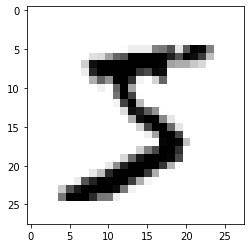

In [6]:
digit = train_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [8]:
test_images.shape
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [82]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [83]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [84]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 1.5142 - accuracy: 0.6630
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6040 - accuracy: 0.8497
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4181 - accuracy: 0.8875
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3575 - accuracy: 0.9003
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3271 - accuracy: 0.9068


In [85]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.9126
test_acc:  0.9125999808311462
